Tugas 1

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Tugas9").getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/29 13:48:52 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1),
    ('Dina', 30, 'F', 3500, 2),
    ('Tom', 40, 'M', 5200, 3),
    ('Nina', 26, 'F', 2900, 3),
    ('Andy', 34, 'M', 4500, 1)
]

columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']

df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')

print("=== Dataset Employees ===")
df.show()

=== Dataset Employees ===
+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
| Dina| 30|     F|  3500|     2|
|  Tom| 40|     M|  5200|     3|
| Nina| 26|     F|  2900|     3|
| Andy| 34|     M|  4500|     1|
+-----+---+------+------+------+



Tugas 2
- Buat SQL query yang menghitung total gaji berdasarkan jenis kelamin dan usia.
- Cari rata-rata gaji per departemen.
- Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.
- Buat ranking karyawan berdasarkan gaji dalam departemen mereka.


In [ ]:
spark.sql('''
SELECT Gender, Age, SUM(Salary) as TotalSalary
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()

+------+---+-----------+
|Gender|Age|TotalSalary|
+------+---+-----------+
|     M| 23|       2700|
|     F| 26|       2900|
|     F| 28|       4100|
|     F| 30|       3500|
|     M| 34|       7500|
|     M| 40|       5200|
+------+---+-----------+



In [ ]:
spark.sql("""
SELECT DeptId, AVG(Salary) AS AvgSalary
FROM employees
GROUP BY DeptId
ORDER BY DeptId
""").show()

+------+---------+
|DeptId|AvgSalary|
+------+---------+
|     1|   3400.0|
|     2|   3800.0|
|     3|   4050.0|
+------+---------+



In [ ]:
spark.sql("""
SELECT e.Name, e.Gender, e.Salary
FROM employees e
JOIN (
    SELECT Gender, AVG(Salary) AS AvgSal
    FROM employees
    GROUP BY Gender
) g ON e.Gender = g.Gender
WHERE e.Salary > g.AvgSal
ORDER BY e.Gender, e.Salary DESC
""").show()


+----+------+------+
|Name|Gender|Salary|
+----+------+------+
|Anna|     F|  4100|
| Tom|     M|  5200|
|Andy|     M|  4500|
+----+------+------+



In [ ]:
spark.sql("""
SELECT Name, DeptId, Salary,
       RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS Rank
FROM employees ORDER BY DeptId, Rank
""").show()


+-----+------+------+----+
| Name|DeptId|Salary|Rank|
+-----+------+------+----+
| Andy|     1|  4500|   1|
| Anna|     2|  4100|   1|
|  Tom|     3|  5200|   1|
|James|     1|  3000|   2|
| Dina|     2|  3500|   2|
| Nina|     3|  2900|   2|
|  Lee|     1|  2700|   3|
+-----+------+------+----+



Tugas 3
- Terapkan window functions untuk menemukan top 3 karyawan dalam kelompok usia tertentu.

In [ ]:
spark.sql("""
SELECT Name, Age, Salary,
       ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) AS rank
FROM employees
ORDER BY Salary DESC, Age ASC
""").show()


+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Tom| 40|  5200|   1|
| Andy| 34|  4500|   1|
| Anna| 28|  4100|   1|
| Dina| 30|  3500|   1|
|James| 34|  3000|   2|
| Nina| 26|  2900|   1|
|  Lee| 23|  2700|   1|
+-----+---+------+----+



In [ ]:
Tugas 4
- Demonstrasi penggunaan multi-level joins dan subqueries untuk analisis data yang mendalam.

SyntaxError: invalid syntax (1247838206.py, line 1)

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees1 = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments1 = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects1 = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees1')
departments.createOrReplaceTempView('departments1')
projects.createOrReplaceTempView('projects1')

# Complex SQL query involving multiple joins and subqueries
spark.sql("""
SELECT e.Name, e.Gender, e.Salary, d.DeptName
FROM employees1 e
JOIN departments1 d ON e.DeptId = d.DeptId
ORDER BY d.DeptName, e.Salary DESC
""").show()


+-----+------+------+---------+
| Name|Gender|Salary| DeptName|
+-----+------+------+---------+
|James|     M|  3000|       HR|
|  Lee|     M|  2700|       HR|
| Anna|     F|  4100|Marketing|
+-----+------+------+---------+



In [ ]:
spark.sql("""
SELECT d.DeptName, SUM(e.Salary) AS TotalGaji
FROM employees1 e
JOIN departments1 d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
ORDER BY TotalGaji DESC
""").show()

+---------+---------+
| DeptName|TotalGaji|
+---------+---------+
|       HR|     5700|
|Marketing|     4100|
+---------+---------+



In [ ]:
spark.sql("""
SELECT d.DeptName, e.Gender, COUNT(*) AS Jumlah
FROM employees1 e
JOIN departments1 d ON e.DeptId = d.DeptId
GROUP BY d.DeptName, e.Gender
ORDER BY d.DeptName, e.Gender
""").show()

+---------+------+------+
| DeptName|Gender|Jumlah|
+---------+------+------+
|       HR|     M|     2|
|Marketing|     F|     1|
+---------+------+------+



Tugas 5
- Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.


In [ ]:
spark.sql("""
SELECT
    Name,
    Age,
    Gender,
    Salary,
    DeptId,
    AVG(Salary) OVER(PARTITION BY DeptId) AS AvgSalaryDept,
    DENSE_RANK() OVER(PARTITION BY DeptId ORDER BY Salary DESC) AS SalaryRank
FROM employees
ORDER BY DeptId, SalaryRank;
""").show


+------+----------+
|DeptId|Avg_Salary|
+------+----------+
|     3|    4050.0|
|     2|    3800.0|
|     1|    3400.0|
+------+----------+



Tugas 6
- Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.


In [ ]:
spark.sql("""
SELECT
    DeptId,
    Name,
    Age,
    Salary,
    LAG(Salary) OVER (PARTITION BY DeptId ORDER BY Age) AS Prev_Salary,
    CASE
        WHEN LAG(Salary) OVER (PARTITION BY DeptId ORDER BY Age) IS NULL THEN 'N/A'
        WHEN Salary > LAG(Salary) OVER (PARTITION BY DeptId ORDER BY Age) THEN 'Naik'
        WHEN Salary < LAG(Salary) OVER (PARTITION BY DeptId ORDER BY Age) THEN 'Turun'
        ELSE 'Tetap'
    END AS Tren_Gaji
FROM employees
ORDER BY DeptId, Age
""").show()

+------+-----+---+------+-----------+---------+
|DeptId| Name|Age|Salary|Prev_Salary|Tren_Gaji|
+------+-----+---+------+-----------+---------+
|     1|  Lee| 23|  2700|       NULL|      N/A|
|     1|James| 34|  3000|       2700|     Naik|
|     1| Andy| 34|  4500|       3000|     Naik|
|     2| Anna| 28|  4100|       NULL|      N/A|
|     2| Dina| 30|  3500|       4100|    Turun|
|     3| Nina| 26|  2900|       NULL|      N/A|
|     3|  Tom| 40|  5200|       2900|     Naik|
+------+-----+---+------+-----------+---------+



In [ ]:
Tugas 7
- Lakukan analisis tren gaji menggunakan Spark SQL dan visualisasikan hasilnya.

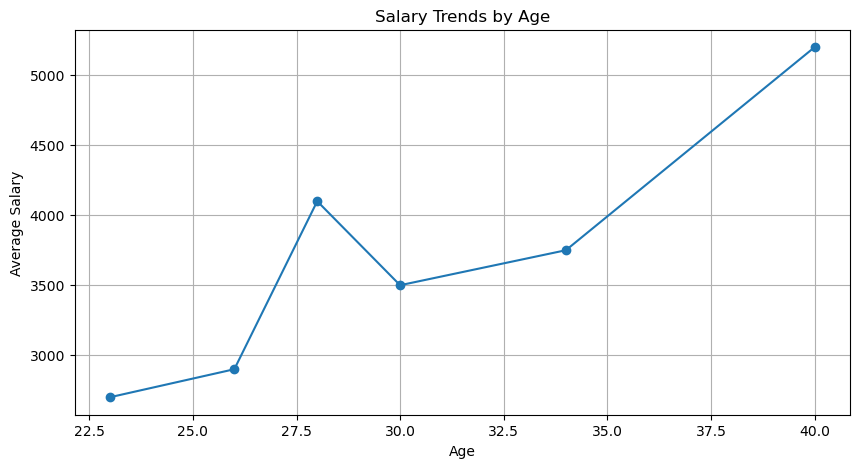

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()

=== Tren Gaji Berdasarkan Usia di Tiap Departemen ===
+------+---+----------+
|DeptId|Age|Avg_Salary|
+------+---+----------+
|     1| 23|    2700.0|
|     1| 34|    3750.0|
|     2| 28|    4100.0|
|     2| 30|    3500.0|
|     3| 26|    2900.0|
|     3| 40|    5200.0|
+------+---+----------+



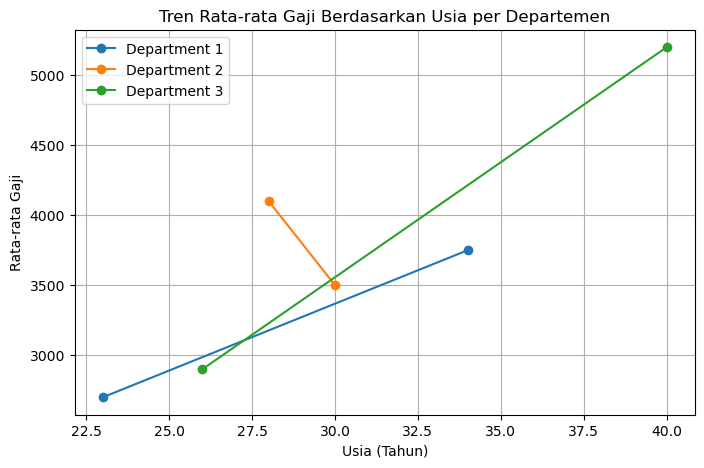

In [ ]:
trend_dept = spark.sql("""
SELECT DeptId, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY DeptId
ORDER BY Age
""")

print("=== Tren Gaji Berdasarkan Usia di Tiap Departemen ===")
trend_dept.show()

pdf = trend_dept.toPandas()

plt.figure(figsize=(8,5))
for dept in sorted(pdf['DeptId'].unique()):
    subset = pdf[pdf['DeptId'] == dept]
    plt.plot(subset['Age'], subset['Avg_Salary'], marker='o', label=f'Department {dept}')

plt.title("Tren Rata-rata Gaji Berdasarkan Usia per Departemen")
plt.xlabel("Usia (Tahun)")
plt.ylabel("Rata-rata Gaji")
plt.legend()
plt.grid(True)
plt.show()

=== Tren Gaji per Departemen Berdasarkan Urutan Usia ===
+------+-----+---+------+-----------+-------------+
|DeptId| Name|Age|Salary|Prev_Salary|Salary_Change|
+------+-----+---+------+-----------+-------------+
|     1|  Lee| 23|  2700|       NULL|         NULL|
|     1|James| 34|  3000|       2700|          300|
|     1| Andy| 34|  4500|       3000|         1500|
|     2| Anna| 28|  4100|       NULL|         NULL|
|     2| Dina| 30|  3500|       4100|         -600|
|     3| Nina| 26|  2900|       NULL|         NULL|
|     3|  Tom| 40|  5200|       2900|         2300|
+------+-----+---+------+-----------+-------------+



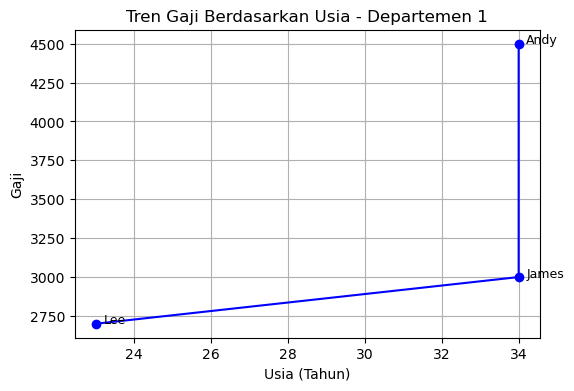

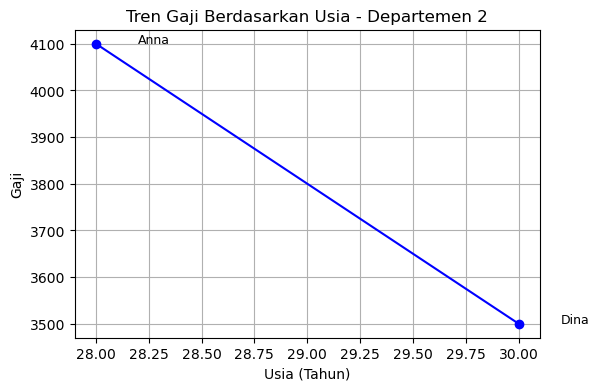

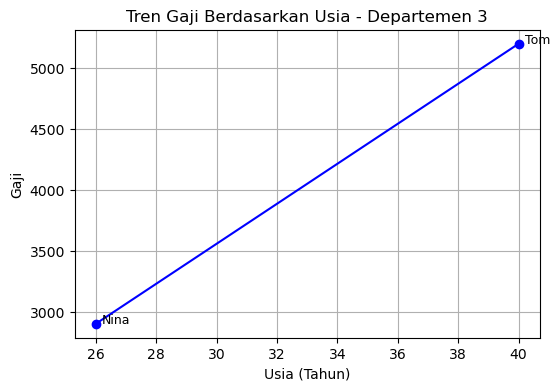

In [ ]:
trend_dept1 = spark.sql("""
SELECT
    DeptId,
    Name,
    Age,
    Salary,
    LAG(Salary) OVER (PARTITION BY DeptId ORDER BY Age) AS Prev_Salary,
    (Salary - LAG(Salary) OVER (PARTITION BY DeptId ORDER BY Age)) AS Salary_Change
FROM employees
ORDER BY DeptId, Age
""")

print("=== Tren Gaji per Departemen Berdasarkan Urutan Usia ===")
trend_dept1.show()

pdf = trend_dept1.toPandas()
unique_depts = sorted(pdf['DeptId'].unique())

for dept in unique_depts:
    subset = pdf[pdf['DeptId'] == dept]
    plt.figure(figsize=(6,4))
    plt.plot(subset['Age'], subset['Salary'], marker='o', color='blue')

    for i, row in subset.iterrows():
        plt.text(row['Age'] + 0.2, row['Salary'], row['Name'], fontsize=9)

    plt.title(f"Tren Gaji Berdasarkan Usia - Departemen {dept}")
    plt.xlabel("Usia (Tahun)")
    plt.ylabel("Gaji")
    plt.grid(True)
    plt.show()


In [ ]:
Homework¶
- Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.
- Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart.
- Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti SUM(), AVG(), COUNT(), serta JOIN antar tabel serta buat visualisasi yang menarik.


+------+-----------+-------------+
|DeptId|TotalSalary|EmployeeCount|
+------+-----------+-------------+
|     1|      10200|            3|
|     2|       7600|            2|
|     3|       8100|            2|
+------+-----------+-------------+



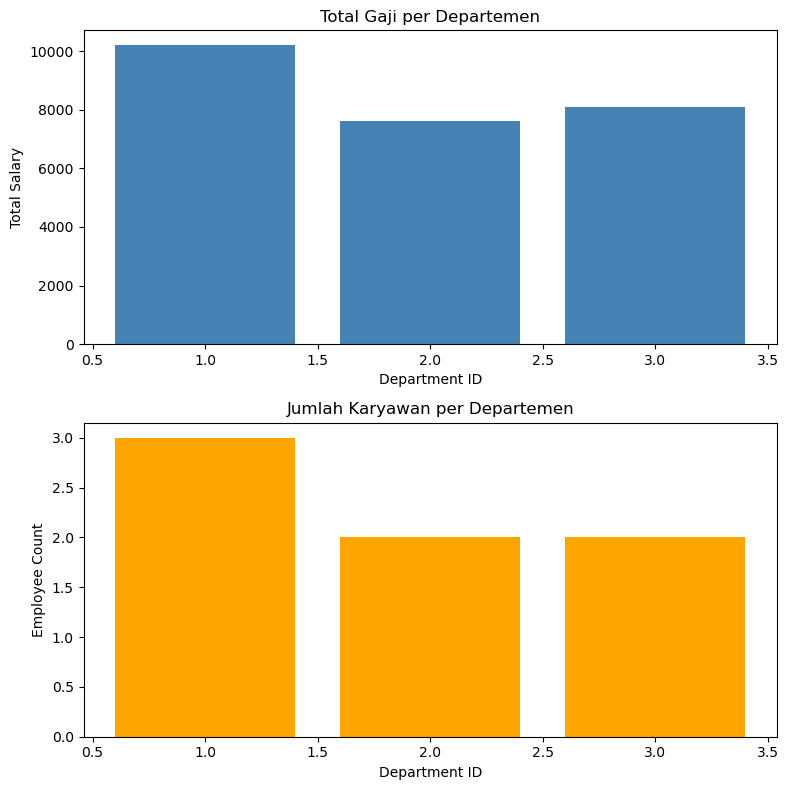

In [ ]:
dept_stats = spark.sql('''
SELECT
    DeptId,
    SUM(Salary) AS TotalSalary,
    COUNT(*) AS EmployeeCount
FROM employees
GROUP BY DeptId
ORDER BY DeptId
''')

dept_stats.show()

fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# Grafik Total Gaji
axes[0].bar(dept_pd['DeptId'], dept_pd['TotalSalary'], color='steelblue')
axes[0].set_title('Total Gaji per Departemen')
axes[0].set_xlabel('Department ID')
axes[0].set_ylabel('Total Salary')

# Grafik Jumlah Karyawan
axes[1].bar(dept_pd['DeptId'], dept_pd['EmployeeCount'], color='orange')
axes[1].set_title('Jumlah Karyawan per Departemen')
axes[1].set_xlabel('Department ID')
axes[1].set_ylabel('Employee Count')

plt.tight_layout()
plt.show()



+-----+---+------+------+------+--------------+
| Name|Age|Gender|Salary|DeptId|      AgeGroup|
+-----+---+------+------+------+--------------+
|James| 34|     M|  3000|     1|Dewasa (30-39)|
| Anna| 28|     F|  4100|     2|  Muda (20-29)|
|  Lee| 23|     M|  2700|     1|  Muda (20-29)|
| Dina| 30|     F|  3500|     2|Dewasa (30-39)|
|  Tom| 40|     M|  5200|     3|  Senior (40+)|
| Nina| 26|     F|  2900|     3|  Muda (20-29)|
| Andy| 34|     M|  4500|     1|Dewasa (30-39)|
+-----+---+------+------+------+--------------+

+----+---+------+------+--------------+------------------+
|Name|Age|Gender|Salary|      AgeGroup|         AvgSalary|
+----+---+------+------+--------------+------------------+
|Andy| 34|     M|  4500|Dewasa (30-39)|3666.6666666666665|
|Anna| 28|     F|  4100|  Muda (20-29)|3233.3333333333335|
+----+---+------+------+--------------+------------------+



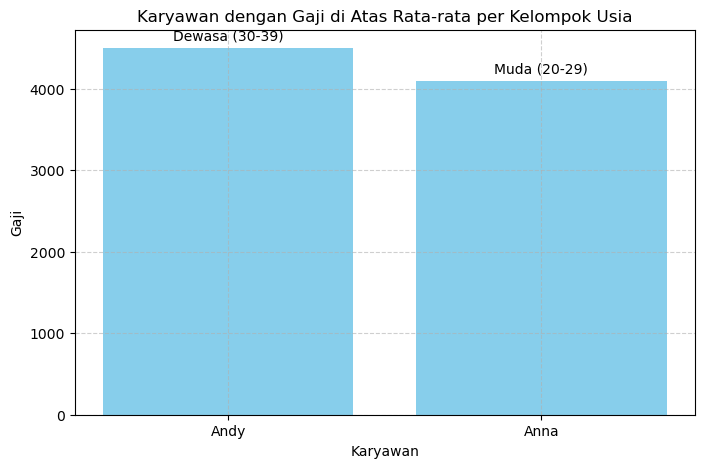

In [ ]:
df_age_group = spark.sql('''
SELECT *,
    CASE
        WHEN Age BETWEEN 20 AND 29 THEN 'Muda (20-29)'
        WHEN Age BETWEEN 30 AND 39 THEN 'Dewasa (30-39)'
        ELSE 'Senior (40+)'
    END AS AgeGroup
FROM employees
''')

df_age_group.show()
df_age_group.createOrReplaceTempView('employees_grouped')

above_avg_salary = spark.sql('''
WITH avg_salary AS (
    SELECT AgeGroup, AVG(Salary) AS AvgSalary
    FROM employees_grouped
    GROUP BY AgeGroup
)
SELECT
    e.Name,
    e.Age,
    e.Gender,
    e.Salary,
    e.AgeGroup,
    a.AvgSalary
FROM employees_grouped e
JOIN avg_salary a ON e.AgeGroup = a.AgeGroup
WHERE e.Salary > a.AvgSalary
ORDER BY e.AgeGroup, e.Salary DESC
''')

above_avg_salary.show()

above_avg_pd = above_avg_salary.toPandas()

# Bar chart
plt.figure(figsize=(8, 5))
plt.bar(above_avg_pd['Name'], above_avg_pd['Salary'], color='skyblue')
plt.xlabel('Karyawan')
plt.ylabel('Gaji')
plt.title('Karyawan dengan Gaji di Atas Rata-rata per Kelompok Usia')

# Tambahkan label usia
for i, row in above_avg_pd.iterrows():
    plt.text(row['Name'], row['Salary'] + 100, row['AgeGroup'], ha='center')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
